<a href="https://colab.research.google.com/github/viking316/ML/blob/main/final_log-reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]
Confusion matrix: 
 [[49 10]
 [ 4 17]]


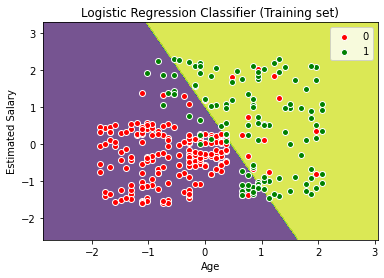

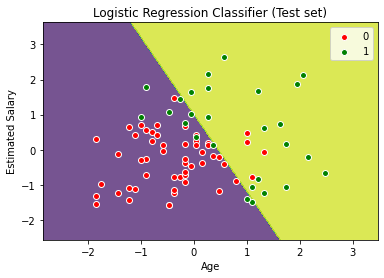

In [1]:
# Logistic Regression

# Importing the libraries
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Social_Network.csv")

# Spliting the dataset in independent and dependent variables
X = dataset.loc[:, ['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling to bring the variable in a single scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting Logistic Regression to the Training set
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logisticregression.predict(X_test)
# print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))



# lets see the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 5 values
y_compare[:5, :]

# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
print("Confusion matrix: \n",cm)

# Visualising the Training set results
X_set, y_set = X_train, y_train
X, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step=0.01), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, step=0.01))


probs = logisticregression.predict(np.array([X.ravel(), X2.ravel()]).T).reshape(X.shape)

plt.contourf(X, X2, probs, alpha=0.75)
plt.xlim(X.min(), X.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j, edgecolor="white")

plt.title('Logistic Regression Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# Visualising the Test set results
X_set, y_set = X_test, y_test
X, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01), np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

probs = logisticregression.predict(np.array([X.ravel(), X2.ravel()]).T).reshape(X.shape)
plt.contourf(X, X2, probs, alpha=0.75)
plt.xlim(X.min(), X.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j, edgecolor="white")

plt.title('Logistic Regression Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()